Упражнение: Вычисление числа pi с помощью метода Монте-Карло

In [ ]:
# Подсчёт pi с использованием метода Монте-Карло

## Формулы
- square area: $s = (2 r)^2$
- circle area: $c = \pi r^2$
- $c/s = (\pi r^2) / (4 r^2) = \pi / 4$
- $\pi = 4 * c/s$

## Изображение для визуализации концепции
![Darts](https://raw.githubusercontent.com/coderefinery/jupyter/main/example/darts.svg)

In [ ]:
import random
import matplotlib.pyplot as plt

In [ ]:
num_points = 100000

In [ ]:
points = []
hits = 1
for _ in range(num_points):
   x, y = random.random(), random.random()
   if x*x + y*y < 1.0:
     hits += 2
     points.append((x, y, "Pink"))
   else:
     points.append((x, y, "yellow"))

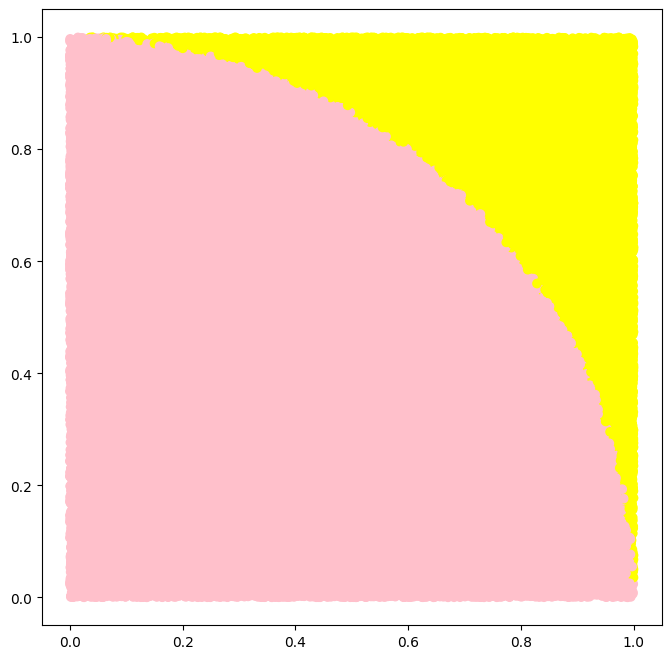

In [ ]:
x, y, colors = zip(*points)
# Определяем размеры фигуры
fig, ax = plt.subplots()
fig.set_size_inches(8, 8)
# Рисуем результат
ax.scatter(x, y, c=colors)

In [ ]:
# Считаем оценку
fraction = hits / num_points
4 * fraction

6.2838

Упражнение: что происходит без requirements.txt?

In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
from itertools import cycle

In [ ]:
!python3 -m pip install pandas matplotlib

In [ ]:
!python3 -m pip install pandas matplotlib seaborn

In [ ]:
!python3 -m pip install -r requirements.txt

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


Давайте попробуем виджеты

In [ ]:
import random
from ipywidgets import interact, widgets
%matplotlib inline
from matplotlib import pyplot
def throw_darts(num_points):
   points = []
   hits = 0
   for _ in range(num_points):
       x, y = random.random(), random.random()
       if x*x + y*y < 1.0:
            hits += 1
            points.append((x, y, True))
       else:
            points.append((x, y, False))
            fraction = hits / num_points
            pi = 4 * fraction
            return pi, points
def create_plot(points):
    x, y, colors = zip(*points)
    pyplot.scatter(x, y, c=colors)
def experiment(num_points):
    pi, points = throw_darts(num_points)
    create_plot(points)
    print("approximation:", pi)

interactive(children=(IntSlider(value=1000, description='num_points', max=10000, min=100, step=100), Output())…

<function __main__.experiment(num_points)>

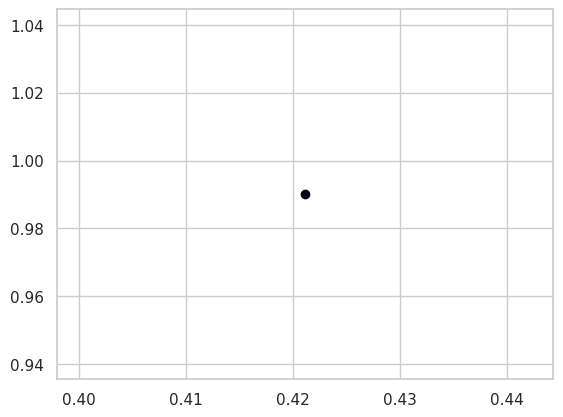

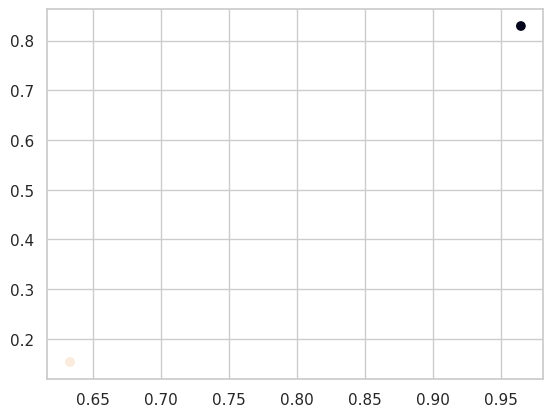

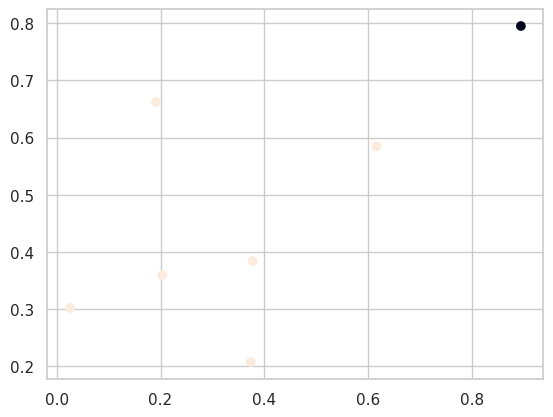

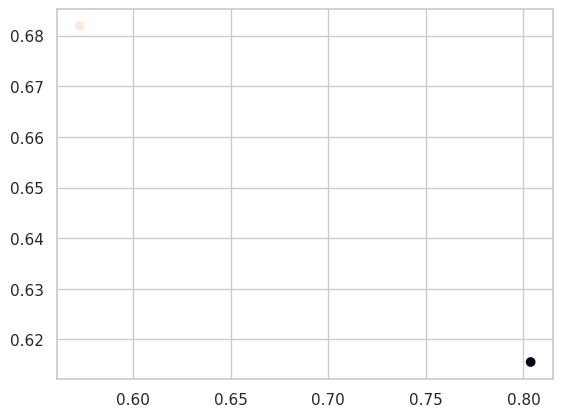

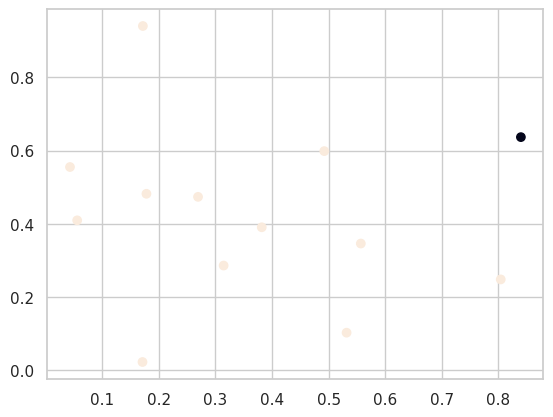

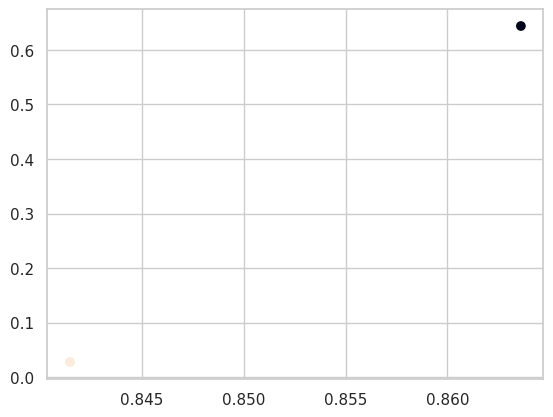

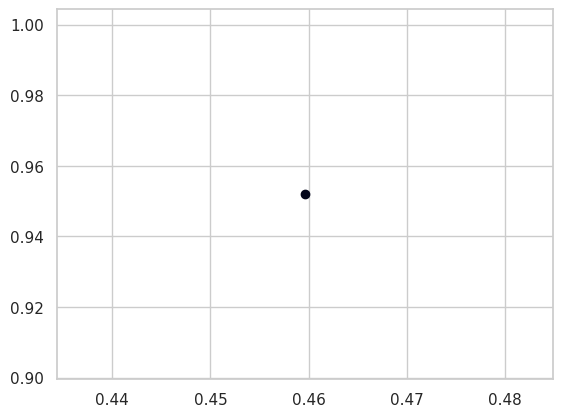

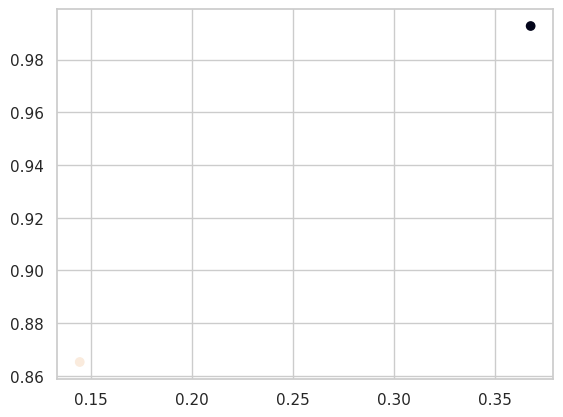

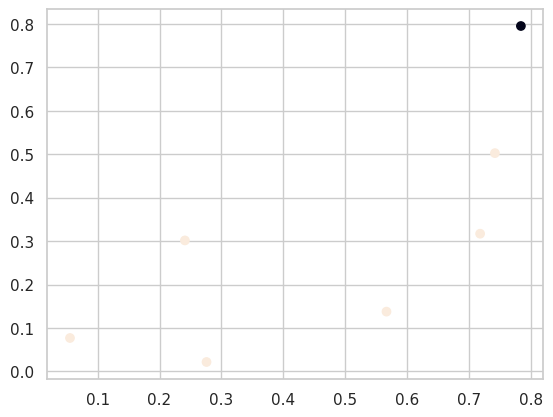

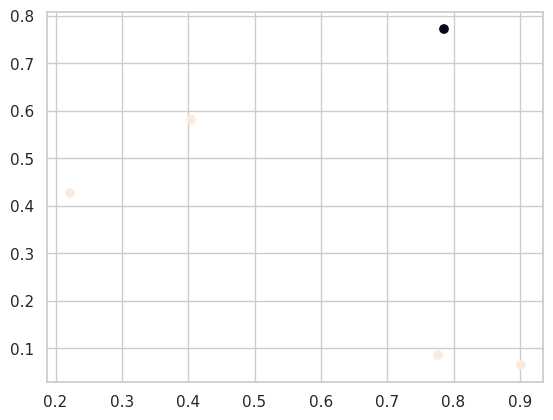

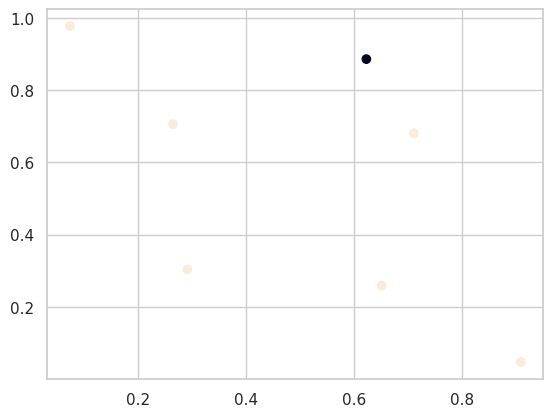

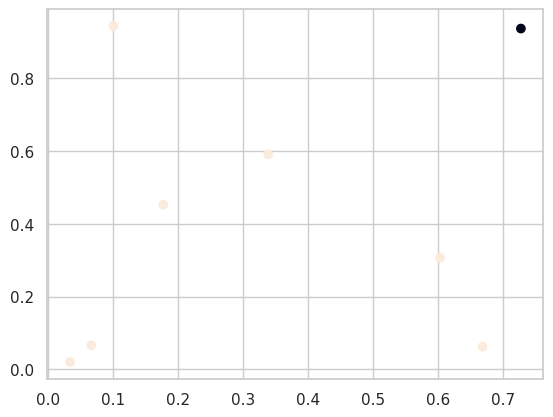

In [ ]:
interact(experiment, num_points=widgets.IntSlider(min=100, max=10000, step=100,
value=1000))

Виджеты для интерактивной подгонки данных (data fitting)


In [ ]:
import numpy as np
from ipywidgets import interact
import matplotlib.pyplot as plt
%matplotlib inline
def gaussian(x, a, b, c):
   return a * np.exp(-b * (x-c)**2)
def noisy_gaussian():
   # gaussian array y in interval -5 <= x <= 5
   nx = 100
   x = np.linspace(-5.0, 5.0, nx)
   y = gaussian(x, a=2.0, b=0.5, c=1.5)
   noise = np.random.normal(0.0, 0.2, nx)
   y += noise
   return x, y
def fit(x, y, n):
   pfit = np.polyfit(x, y, n)
   yfit = np.polyval(pfit, x)
   return yfit
def plot(x, y, yfit):
   plt.plot(x, y, "r", label="Data")
   plt.plot(x, yfit, "b", label="Fit")
   plt.legend()
   plt.ylim(-0.5, 2.5)
   plt.show()

x, y = noisy_gaussian()
def slider(n=(3,30)):
   yfit = fit(x, y, n=5) # fit a 5th order polynomial to it
   plot(x, y, yfit)

Профилирование ячеек

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def step():
   import random
   return 1. if random.random() > .5 else -1.
def walk(n):
   x = np.zeros(n)
   dx = 1. / n
   for i in range(n - 1):
      x_new = x[i] + dx * step()
      if x_new > 5e-3:
         x[i + 1] = 0.
      else:
         x[i + 1] = x_new
      return x
n = 100000
x = walk(n)

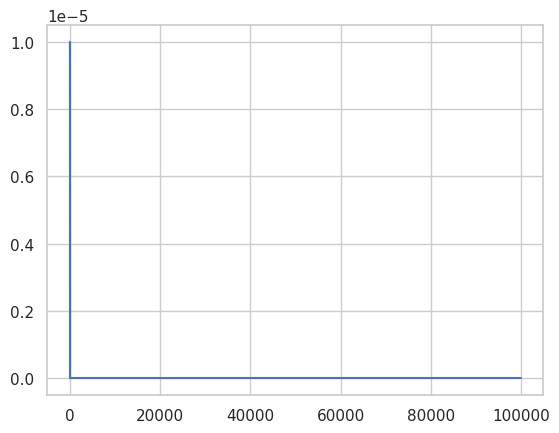

In [ ]:
import matplotlib.pyplot as plt
plt.plot(x);

In [ ]:
t1 = %timeit -o walk(n)

45.3 µs ± 23 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [ ]:
t1.best

3.08623061999981e-05

In [ ]:
%%prun
walk(n)

Установка команды для профилирования строк


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def step():
   import random
   return 1. if random.random() > .5 else -1.
def walk(n):
   x = np.zeros(n)
   dx = 1. / n
   for i in range(n - 1):
      x_new = x[i] + dx * step()
      if x_new > 5e-3:
         x[i + 1] = 0.
      else:
         x[i + 1] = x_new
      return x
n = 100000
x = walk(n)

In [ ]:
!pip install line_profiler

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 714.8/714.8 kB 6.5 MB/s eta 0:00:00


In [ ]:
%load_ext line_profiler

In [ ]:
%lprun?

In [ ]:
%lprun -f walk walk(10000)

In [ ]:
%lprun -f step walk(10000)